In [716]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [717]:
words = (open('./names.txt', 'r').read().splitlines())
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [718]:
len(words)

32033

In [719]:
# build the vocabulary
chars = sorted(list(set(''.join(words))))
stoi = {char: i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i: char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [720]:
block_size = 3
X, Y = [], []
for word in words[:5]:
    context = [0]*block_size
    print(word)
    for chr in word + '.':
        ix = stoi[chr]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '-->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .
isabella
... --> i
..i --> s
.is --> a
isa --> b
sab --> e
abe --> l
bel --> l
ell --> a
lla --> .
sophia
... --> s
..s --> o
.so --> p
sop --> h
oph --> i
phi --> a
hia --> .


In [721]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [722]:
C = torch.randn((27,2)) # we have chosen 2-d space randomly that's why we 27x2

In [723]:
C[5]

tensor([-1.2984,  0.3572])

In [724]:
# DISCARDED: as indexing faster
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # requires torch.tensor

tensor([-1.2984,  0.3572])

We can think as linear neurons with weight matrix C, encoding into one_hot OR we can index

In [725]:
C[torch.tensor([5,5,6,7])] # we can do this

tensor([[-1.2984,  0.3572],
        [-1.2984,  0.3572],
        [ 0.6630, -0.1984],
        [ 1.3366,  0.1366]])

In [726]:
C[X] # 32 x 3 x 2, we have retrieved embedding vector
# for each of those 32 x 3 we have retrieved the embedding matrix

tensor([[[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-1.2984,  0.3572]],

        [[ 0.1762, -1.6816],
         [-1.2984,  0.3572],
         [-1.1138, -0.8470]],

        [[-1.2984,  0.3572],
         [-1.1138, -0.8470],
         [-1.1138, -0.8470]],

        [[-1.1138, -0.8470],
         [-1.1138, -0.8470],
         [-2.0345, -0.3649]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-0.0358,  0.8764]],

        [[ 0.1762, -1.6816],
         [-0.0358,  0.8764],
         [-0.4290, -0.3833]],

        [[-0.0358,  0.8764],
         [-0.4290, -0.3833],
         [ 0.4510,  0.8313]],

        [[-0.4290, -0.3833],
         [ 0.4510,  0.8313],
         [ 0.6105,  0.7334]],

        [[ 0.4510,  0.8313],
         [ 0.6105,  0.7334],
         [ 0.4510,  0.8313]],

        [[ 0.6105,  0

In [727]:
X[13,2]

tensor(1)

In [728]:
C[X[13,2]] == C[1]

tensor([True, True])

In [729]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [730]:
# hidden layer
W1 = torch.randn((6, 100)) # 6 as and 100 arbitrary
b1 = torch.randn(100)

In [731]:
# enc @ W1 + b1 will NOT work as 32 x 3 x 2 cannot be multiplied by 6 x 100
# we want enc to be 32 x 3 x 2
# we use torch.cat
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) # we did it wrt dim 1 and not dim 0
# all the 3 (block_size) lists for a single char with two elements (2-d space) has been concatenated

tensor([[ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -1.2984,  0.3572],
        [ 0.1762, -1.6816, -1.2984,  0.3572, -1.1138, -0.8470],
        [-1.2984,  0.3572, -1.1138, -0.8470, -1.1138, -0.8470],
        [-1.1138, -0.8470, -1.1138, -0.8470, -2.0345, -0.3649],
        [ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -0.0358,  0.8764],
        [ 0.1762, -1.6816, -0.0358,  0.8764, -0.4290, -0.3833],
        [-0.0358,  0.8764, -0.4290, -0.3833,  0.4510,  0.8313],
        [-0.4290, -0.3833,  0.4510,  0.8313,  0.6105,  0.7334],
        [ 0.4510,  0.8313,  0.6105,  0.7334,  0.4510,  0.8313],
        [ 0.6105,  0.7334,  0.4510,  0.8313, -2.0345, -0.3649],
        [ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -2.0345, -0.3649],
        [ 0.1762, -1.6816, -2.0345, -0.3649,  0.6105,  0.7334],
        [-2.0345, -0.3649,  0.6105,  0.7

In [732]:
emb

tensor([[[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-1.2984,  0.3572]],

        [[ 0.1762, -1.6816],
         [-1.2984,  0.3572],
         [-1.1138, -0.8470]],

        [[-1.2984,  0.3572],
         [-1.1138, -0.8470],
         [-1.1138, -0.8470]],

        [[-1.1138, -0.8470],
         [-1.1138, -0.8470],
         [-2.0345, -0.3649]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816]],

        [[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-0.0358,  0.8764]],

        [[ 0.1762, -1.6816],
         [-0.0358,  0.8764],
         [-0.4290, -0.3833]],

        [[-0.0358,  0.8764],
         [-0.4290, -0.3833],
         [ 0.4510,  0.8313]],

        [[-0.4290, -0.3833],
         [ 0.4510,  0.8313],
         [ 0.6105,  0.7334]],

        [[ 0.4510,  0.8313],
         [ 0.6105,  0.7334],
         [ 0.4510,  0.8313]],

        [[ 0.6105,  0

In [733]:
torch.unbind(emb, 1) # equal as before

(tensor([[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-1.2984,  0.3572],
         [-1.1138, -0.8470],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-0.0358,  0.8764],
         [-0.4290, -0.3833],
         [ 0.4510,  0.8313],
         [ 0.6105,  0.7334],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-2.0345, -0.3649],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.4510,  0.8313],
         [-0.7485, -1.4595],
         [-2.0345, -0.3649],
         [ 0.2354,  0.8595],
         [-1.2984,  0.3572],
         [-0.4290, -0.3833],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-0.7485, -1.4595],
         [-0.0358,  0.8764],
         [-0.3193, -0.4406],
         [-1.5248, -0.7160]]),
 tensor([[ 0.1762, -1.6816],
         [ 0.1762, -1.6816],
         [-1

In [734]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [735]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [736]:
a.view((3,6))

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [737]:
a.view((3,3,2)) # it can be viewed as whatever we want

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [738]:
a.storage() # how it is in memory
# by calling view, we dictate how it's interpretated: storage offset, stride, shape
# refer Eric PyTorch Internals

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [739]:
emb.view((32, 6)) # BINGO!!!!!!!!! extremely efficient

tensor([[ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -1.2984,  0.3572],
        [ 0.1762, -1.6816, -1.2984,  0.3572, -1.1138, -0.8470],
        [-1.2984,  0.3572, -1.1138, -0.8470, -1.1138, -0.8470],
        [-1.1138, -0.8470, -1.1138, -0.8470, -2.0345, -0.3649],
        [ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -0.0358,  0.8764],
        [ 0.1762, -1.6816, -0.0358,  0.8764, -0.4290, -0.3833],
        [-0.0358,  0.8764, -0.4290, -0.3833,  0.4510,  0.8313],
        [-0.4290, -0.3833,  0.4510,  0.8313,  0.6105,  0.7334],
        [ 0.4510,  0.8313,  0.6105,  0.7334,  0.4510,  0.8313],
        [ 0.6105,  0.7334,  0.4510,  0.8313, -2.0345, -0.3649],
        [ 0.1762, -1.6816,  0.1762, -1.6816,  0.1762, -1.6816],
        [ 0.1762, -1.6816,  0.1762, -1.6816, -2.0345, -0.3649],
        [ 0.1762, -1.6816, -2.0345, -0.3649,  0.6105,  0.7334],
        [-2.0345, -0.3649,  0.6105,  0.7

In [740]:
emb.view((32, 6)) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [741]:
h = emb.view((-1, 6)) @ W1 + b1
h.shape # our hidden layer of activatiosn

torch.Size([32, 100])

In [742]:
# concatenate uses new memory so very very inefficient
h = torch.tanh(h) # between -1 and 1

In [743]:
(emb.view((-1, 6)) @ W1).shape

torch.Size([32, 100])

In [744]:
b1.shape

torch.Size([100])

In [745]:
# 32, 100
# 1, 100
# it will be copied, same bias vector will be added so GOOD here

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [746]:
logits = h @ W2 + b2

In [747]:
logits

tensor([[-2.3265e+01,  6.5756e-01,  7.5487e+00,  3.8052e+00,  7.2355e+00,
          3.3855e-01,  3.3862e-01,  4.3038e+00,  9.0797e+00,  6.0261e+00,
         -1.2647e+01, -1.1286e+01, -1.6390e+01, -6.0157e+00,  3.2192e+00,
          9.6446e+00, -1.2575e+01, -1.8075e+01, -5.4099e+00,  1.5415e+01,
         -9.7817e+00, -8.1113e+00,  1.0937e+01,  1.9882e+01,  7.2454e+00,
          3.5403e+00,  1.7809e+01],
        [-1.9836e+01,  6.7734e+00,  4.1257e+00,  6.8383e+00,  1.0174e+01,
          5.6726e-01, -3.0076e+00,  9.9310e+00,  6.1166e+00, -6.4465e+00,
          1.8986e+00, -9.1921e+00, -1.0119e+01, -1.0872e+01, -7.2636e+00,
          1.4440e+01, -1.0785e+01, -1.2874e+01, -7.4358e+00, -3.8525e+00,
         -7.6916e+00, -1.3355e+01,  5.0391e+00,  4.9254e+00,  7.7017e+00,
         -4.6863e+00,  1.3281e+01],
        [-2.0373e+01,  8.0340e+00,  1.1172e+01, -1.1680e+01,  5.5196e+00,
         -1.2892e+01, -3.0983e+00, -7.1370e-01,  5.7339e+00, -7.0551e+00,
         -7.2662e-01, -6.4438e+00, -1.86

In [748]:
counts = logits.exp()

In [749]:
prob = counts / counts.sum(1, keepdim=True)

In [750]:
prob

tensor([[1.6044e-19, 3.9349e-09, 3.8700e-06, 9.1611e-08, 2.8295e-06, 2.8602e-09,
         2.8604e-09, 1.5083e-07, 1.7891e-05, 8.4422e-07, 6.5595e-15, 2.5585e-14,
         1.5529e-16, 4.9746e-12, 5.0983e-08, 3.1474e-05, 7.0478e-15, 2.8813e-17,
         9.1174e-12, 1.0096e-02, 1.1514e-13, 6.1189e-13, 1.1463e-04, 8.7912e-01,
         2.8577e-06, 7.0290e-08, 1.1061e-01],
        [9.6955e-16, 3.4911e-04, 2.4721e-05, 3.7251e-04, 1.0465e-02, 7.0413e-07,
         1.9729e-08, 8.2091e-03, 1.8101e-04, 6.3332e-10, 2.6659e-06, 4.0665e-11,
         1.6087e-11, 7.5833e-12, 2.7975e-10, 7.4535e-01, 8.2646e-12, 1.0240e-12,
         2.3548e-10, 8.4755e-09, 1.8234e-10, 6.3303e-13, 6.1624e-05, 5.5000e-05,
         8.8331e-04, 3.6817e-09, 2.3404e-01],
        [1.1096e-14, 2.4112e-02, 5.5613e-01, 6.6159e-11, 1.9509e-03, 1.9680e-11,
         3.5282e-07, 3.8298e-06, 2.4172e-03, 6.7475e-09, 3.7807e-06, 1.2434e-08,
         6.2765e-14, 6.0001e-11, 8.7054e-06, 5.0279e-04, 9.2577e-08, 2.0390e-12,
         3.7346e-

In [751]:
prob[0].sum()

tensor(1.)

In [752]:
prob.shape

torch.Size([32, 27])

In [753]:
loss = -prob[torch.arange(32), Y].log().mean() # gives current probability given by current nn
loss

tensor(18.4364)

In [1069]:
## --- NOW MORE REPRODUCIBLE --- ##
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for word in words:
        context = [0]*block_size
        for chr in word + '.':
            ix = stoi[chr]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape) # dataset
    return X, Y

import random
random.seed(69)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182670, 3]) torch.Size([182670])
torch.Size([22682, 3]) torch.Size([22682])
torch.Size([22794, 3]) torch.Size([22794])


In [1070]:
g = torch.Generator().manual_seed(10)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

In [1071]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [1072]:
for p in parameters:
  p.requires_grad = True

In [1073]:
lri, lossi, stepi = [], [], []

In [1074]:
for i in range(200000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    # Upgrade
    for p in parameters:
        p.data += -lr * p.grad # learning rate too high
    stepi.append(i)
    lossi.append(loss.log10().item())
    
#print(loss.item())

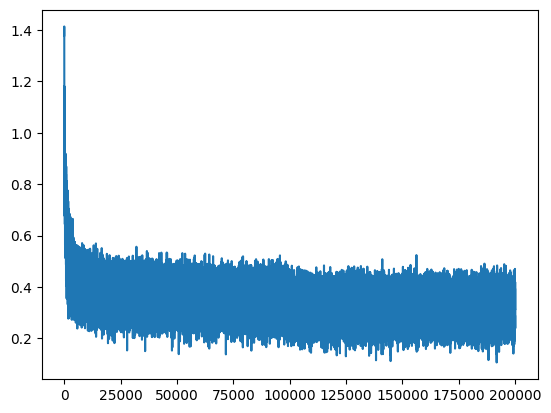

In [1075]:
plt.plot(stepi, lossi)

In [1076]:
emb = C[Xtr]
h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss # bigram was 2.45 something, we surpassed it already

tensor(2.1088, grad_fn=<NllLossBackward0>)

In [1077]:
emb = C[Xdev]
h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss # bigram was 2.45 something, we surpassed it already

tensor(2.1640, grad_fn=<NllLossBackward0>)

split data into train, dev (validation), test

80%, 10%, 10%

train for training duh

dev for size of emb and size of nn

test for evaluating performance

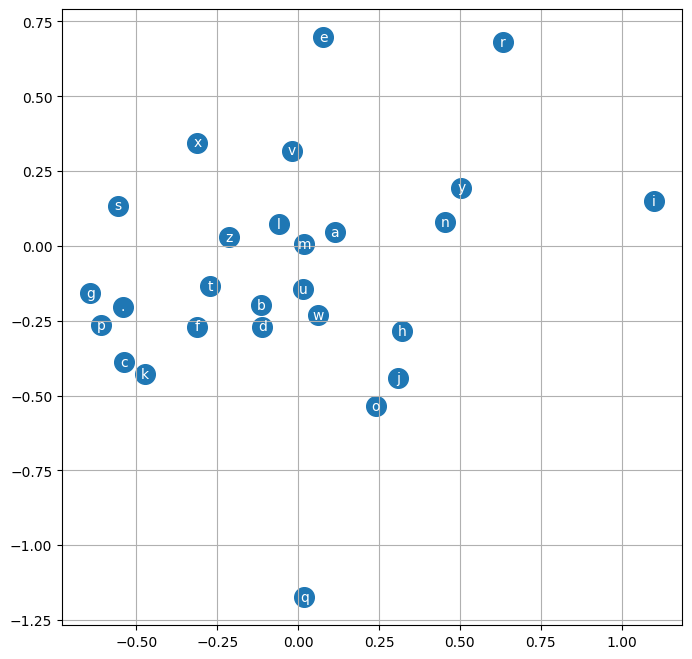

In [1078]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')


In [1079]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [1080]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
amelle.
khi.
milia.
aty.
halaysleem.
hubnalee.
rhy.
kaeli.
nellara.
chaiiv.
kaleigh.
ham.
ford.
quinton.
lilea.
jadiq.
wateloginarynn.
frae.
pirsabeed.
